In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
matplotlib.use('Agg')

In [27]:
def one_try(TIME=10**3, initial_market_price=1.0, initial_net_loan=0.0, initial_financial_asset=1.0):
    market_price = np.array([0.0]*TIME)
    loan = np.array([0.0]*TIME)
    deposit = np.array([0.0]*TIME)
    financial_asset = np.array([0.0]*TIME)
    market_price[0] = initial_market_price
    loan[0] = min(0.0,initial_net_loan)
    deposit[0] = max(0.0,initial_net_loan)
    financial_asset[0] = initial_financial_asset
    u = 0.0

    for i in range(TIME-1):
        t = np.exp(0.03*np.random.randn() + 0.0001)
        market_price[i+1] = market_price[i]*t
        financial_asset[i+1] = financial_asset[i]*t
        if market_price[i+1] > market_price[i]:
            u = 0.5 * financial_asset[i+1]*(market_price[i+1]/market_price[i] - 1)
            financial_asset[i+1] -= u
            if loan[i] < -u:
                loan[i+1] = loan[i] + u
                deposit[i+1] = 0
            elif -u <= loan[i] < 0:
                loan[i+1] = 0
                deposit[i+1] = u - loan[i]
            else:
                loan[i+1] = 0
                deposit[i+1] = deposit[i] + u
        else:
            u = 0.75 * (deposit[i]+0.7*financial_asset[i]) * (1 - market_price[i+1]/market_price[i])
            financial_asset[i + 1] += u
            if deposit[i] > u:
                deposit[i+1] = deposit[i] - u
            elif loan[i] == 0:
                deposit[i+1] = 0
                loan[i+1] = deposit[i] - u
            else:
                if -0.7*financial_asset[i+1] < loan[i] - u: #   借入上限に余裕があるとき
                    loan[i+1] = loan[i] - u
                else:   #   借入上限にかかるとき
                    loan[i+1] = -0.7*financial_asset[i+1]
                    financial_asset[i+1] = financial_asset[i] + (0.7*financial_asset[i+1] + (loan[i] - u))


    asset = deposit+financial_asset
    net_asset = asset+loan

    plt.plot(np.arange(TIME), market_price, label="market price", color="black")
    plt.plot(np.arange(TIME), net_asset, label="net asset", color="gray")
    plt.plot(np.arange(TIME), asset, label="asset", color="blue")
    plt.plot(np.arange(TIME), loan, label="loan", color="red")
    plt.plot(np.arange(TIME), deposit, label="deposit", color="green")
    plt.plot(np.arange(TIME), financial_asset, label="financial asset", color="brown")

    #plt.yscale("log")
    plt.show()
    print("final market price:",market_price[-1])
    print("final net asset:",net_asset[-1])
    print()

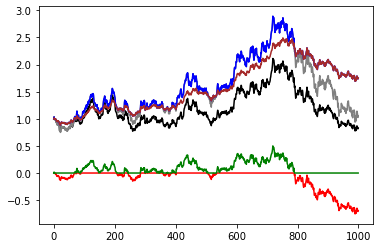

final market price: 0.8261846417744478
final net asset: 1.0510619408784234



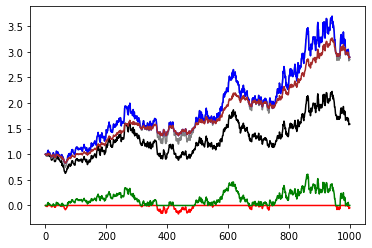

final market price: 1.5891335552206491
final net asset: 2.84840345650856



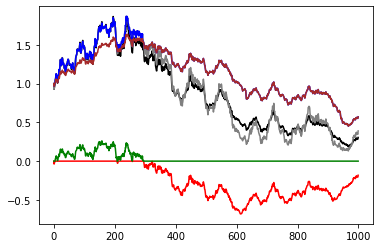

final market price: 0.3056063608026051
final net asset: 0.3896052855223293



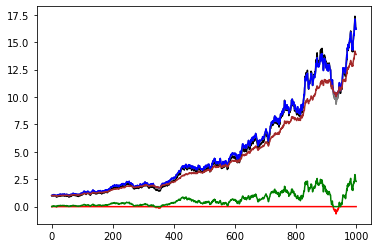

final market price: 16.23549846295585
final net asset: 16.173492390943206



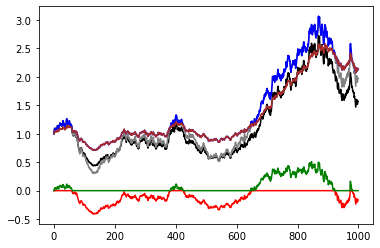

final market price: 1.5706820703163287
final net asset: 1.9783215699666754



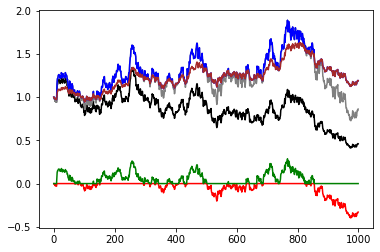

final market price: 0.46146340594269075
final net asset: 0.8634986260661502



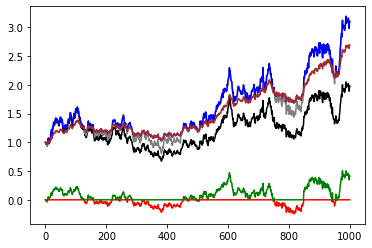

final market price: 1.9766236630565133
final net asset: 3.101408386605545



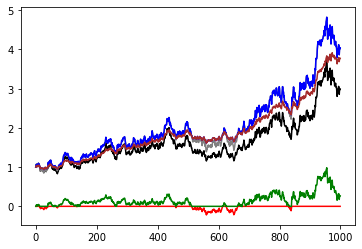

final market price: 2.992079643972914
final net asset: 4.041753630807873



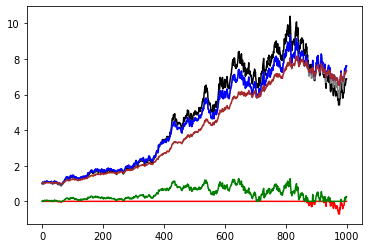

final market price: 6.871883142907176
final net asset: 7.599932704378563



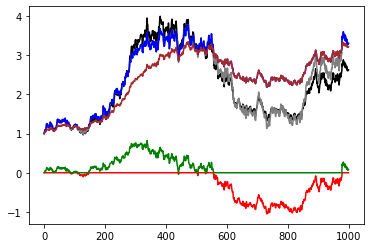

final market price: 2.626500381294389
final net asset: 3.3019712494377287



In [29]:
for _ in range(10):
    one_try(TIME=1000)

In [37]:
def no_loan_one_try(TIME=10**3, initial_market_price=1.0, initial_deposit=0.0, initial_financial_asset=1.0):
    market_price = np.array([0.0]*TIME)
    deposit = np.array([0.0]*TIME)
    financial_asset = np.array([0.0]*TIME)
    market_price[0] = initial_market_price
    deposit[0] = initial_deposit
    financial_asset[0] = initial_financial_asset
    u = 0.0

    for i in range(TIME-1):
        t = np.exp(0.03*np.random.randn() + 0.0001)
        market_price[i+1] = market_price[i]*t
        financial_asset[i+1] = financial_asset[i]*t
        if market_price[i+1] > market_price[i]:
            u = 0.5 * financial_asset[i+1]*(market_price[i+1]/market_price[i] - 1)
            financial_asset[i+1] -= u
            deposit[i+1] = deposit[i] + u
        else:
            u = 0.75 * (deposit[i]+0.7*financial_asset[i]) * (1 - market_price[i+1]/market_price[i])
            if deposit[i] - u > 0:
                financial_asset[i + 1] += u
                deposit[i+1] = deposit[i] - u
            else:
                financial_asset[i + 1] += deposit[i]
                deposit[i+1] = 0

    asset = deposit+financial_asset

    plt.plot(np.arange(TIME), market_price, label="market price", color="black")
    plt.plot(np.arange(TIME), asset, label="asset", color="blue")
    plt.plot(np.arange(TIME), deposit, label="deposit", color="green")
    plt.plot(np.arange(TIME), financial_asset, label="financial asset", color="brown")

    #plt.yscale("log")
    plt.show()
    print("final market price:",market_price[-1])
    print("final asset:",asset[-1])
    print()

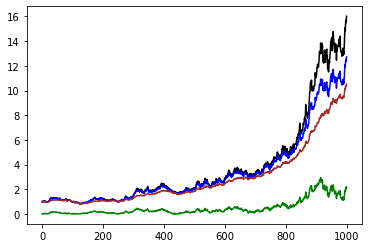

final market price: 16.020251331082214
final asset: 12.723013704510656



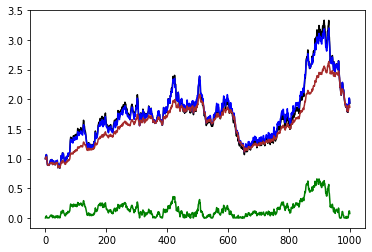

final market price: 1.9318741614599317
final asset: 1.9427542433191092



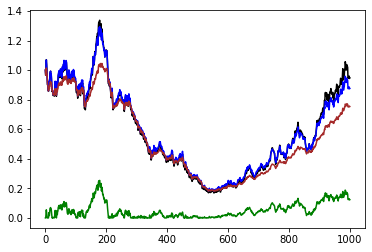

final market price: 0.9474634135926642
final asset: 0.876728299647072



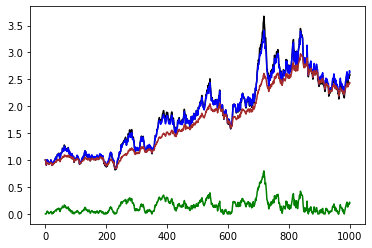

final market price: 2.5768279070627007
final asset: 2.63452330611167



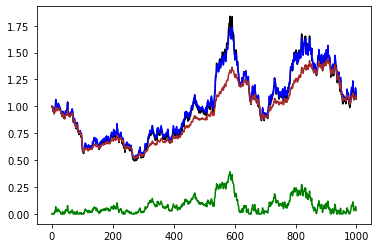

final market price: 1.0675698435609555
final asset: 1.1039032180941177



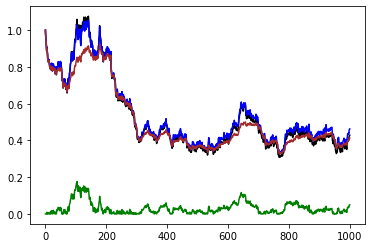

final market price: 0.42859776179549275
final asset: 0.46263815787824303



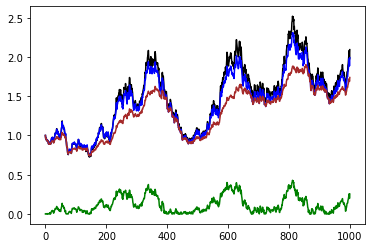

final market price: 2.0942826858352164
final asset: 1.992009946872604



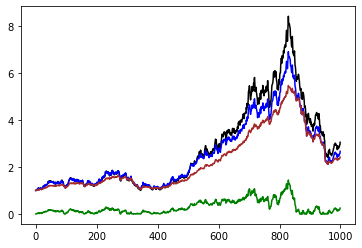

final market price: 3.0478337269229825
final asset: 2.66384055830686



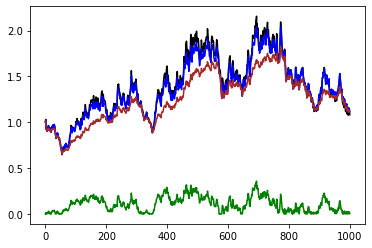

final market price: 1.0825314563421755
final asset: 1.1160218665885306



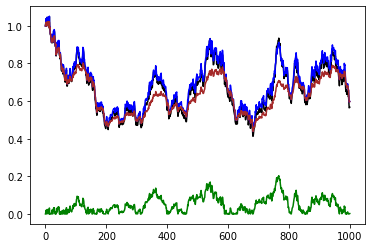

final market price: 0.5677799176437227
final asset: 0.5986844946304769



In [38]:
for _ in range(10):
    no_loan_one_try(TIME=1000)

In [14]:
def integrate_try(run, TIME=10**3, initial_market_price=1.0, initial_net_deposit=0.0, initial_financial_asset=1.0, folda_name=""):
    market_price = np.array([0.0]*TIME)
    loan = np.array([0.0]*TIME)
    deposit1 = np.array([0.0]*TIME)
    deposit2 = np.array([0.0]*TIME)
    financial_asset1 = np.array([0.0]*TIME)
    financial_asset2 = np.array([0.0]*TIME)
    market_price[0] = initial_market_price
    loan[0] = min(0.0,initial_net_deposit)
    deposit1[0] = max(0.0,initial_net_deposit)
    deposit2[0] = max(0.0,initial_net_deposit)
    financial_asset1[0] = initial_financial_asset
    financial_asset2[0] = initial_financial_asset
    u = 0.0

    for i in range(TIME-1):
        t = 0.0
        if 0.4*TIME < i < 0.6*TIME:
            t = np.exp(0.06*np.random.randn() - 0.01)####################################################################
        else:
            t = np.exp(0.06*np.random.randn() + 0.004)####################################################################
        market_price[i+1] = market_price[i]*t
        
        # loan OK ver.
        financial_asset1[i+1] = financial_asset1[i]*t
        if market_price[i+1] > market_price[i]:
            u = 0.5 * (0.7*deposit1[i]+financial_asset1[i])*(market_price[i+1]/market_price[i] - 1)##########################################
            financial_asset1[i+1] -= u
            if loan[i] < -u:
                loan[i+1] = loan[i] + u
                deposit1[i+1] = 0
            elif -u <= loan[i] < 0:
                loan[i+1] = 0
                deposit1[i+1] = u - loan[i]
            else:
                loan[i+1] = 0
                deposit1[i+1] = deposit1[i] + u
        else:
            u = 0.7 * (deposit1[i]+0.7*financial_asset1[i]) * (1 - market_price[i+1]/market_price[i])#######################
            financial_asset1[i + 1] += u
            if deposit1[i] > u:
                deposit1[i+1] = deposit1[i] - u
            elif loan[i] == 0:
                deposit1[i+1] = 0
                loan[i+1] = deposit1[i] - u
            else:
                if -0.7*financial_asset1[i+1] < loan[i] - u: #   借入上限に余裕があるとき ##################################
                    loan[i+1] = loan[i] - u
                else:   #   借入上限にかかるとき
                    loan[i+1] = -0.7*financial_asset1[i+1]
                    financial_asset1[i+1] = financial_asset1[i] + (0.7*financial_asset1[i+1] + (loan[i] - u))

                    
        # loan NG ver
        financial_asset2[i+1] = financial_asset2[i]*t
        if market_price[i+1] > market_price[i]:
            u = 0.5 * (0.7*deposit2[i]+financial_asset2[i])*(market_price[i+1]/market_price[i] - 1)############################
            financial_asset2[i+1] -= u
            deposit2[i+1] = deposit2[i] + u
        else:
            u = 0.7 * (deposit2[i]+0.7*financial_asset2[i]) * (1 - market_price[i+1]/market_price[i])##############################
            if deposit2[i] - u > 0:
                financial_asset2[i + 1] += u
                deposit2[i+1] = deposit2[i] - u
            else:
                financial_asset2[i + 1] += deposit2[i]
                deposit2[i+1] = 0
        
        
    asset1 = deposit1+financial_asset1
    asset2 = deposit2+financial_asset2
    net_asset = asset1+loan

    if run < 10:
        fig = plt.figure(figsize = [20, 5])
        axL = fig.add_subplot(1, 2, 1)
        axR = fig.add_subplot(1, 2, 2)

        axL.set_title("loan OK ver")
        axL.plot(np.arange(TIME), market_price, label="market price", color="black")
        axL.plot(np.arange(TIME), net_asset, label="net asset", color="gray")
        axL.plot(np.arange(TIME), asset1, label="asset1", color="blue")
        axL.plot(np.arange(TIME), loan, label="loan", color="red")
        axL.plot(np.arange(TIME), deposit1, label="deposit1", color="green")
        axL.plot(np.arange(TIME), financial_asset1, label="financial asset1", color="brown")

        axR.set_title("loan NG ver")
        axR.plot(np.arange(TIME), market_price, label="market price", color="black")
        axR.plot(np.arange(TIME), asset2, label="asset2", color="blue")
        axR.plot(np.arange(TIME), deposit2, label="deposit2", color="green")
        axR.plot(np.arange(TIME), financial_asset2, label="financial asset2", color="brown")

        if run==0:
            print("#################################################")
            print("init parameters")
            print("initial_market_price =", initial_market_price)
            print("initial_net_deposit =", initial_net_deposit)
            print("initial_financial_asset =", initial_financial_asset)
            print("#################################################")
        file_name = folda_name + "run" + str(run)
        file_name = file_name.replace(".", "p")
        fig.savefig(os.path.join(folda_name, file_name+".png"))#パラメータが違えば異なるファイル名がつくように
        print("run",run+1)
        print("figure file name = "+file_name+".png")
        print("final market price:",market_price[-1])
        print("final net asset, loan OK ver.:",net_asset[-1])
        print("final net asset, loan NG ver.:",asset2[-1])
        print("amplification of market price:",market_price[-1]/market_price[0])
        print("amplification of final net asset, loan OK ver.:",net_asset[-1]/net_asset[0])
        print("amplification of final net asset, loan NG ver.:",asset2[-1]/asset2[0])
        print("odds rate of final net asset, loan OK ver.:",(net_asset[-1]/net_asset[0]) / (market_price[-1]/market_price[0]))
        print("odds rate of final net asset, loan NG ver.:",(asset2[-1]/asset2[0]) / (market_price[-1]/market_price[0]))
        print()
    
    return market_price[-1], net_asset[-1], asset2[-1], \
            market_price[-1]/market_price[0], net_asset[-1]/net_asset[0], asset2[-1]/asset2[0], \
            (net_asset[-1]/net_asset[0]) / (market_price[-1]/market_price[0]), (asset2[-1]/asset2[0]) / (market_price[-1]/market_price[0])

In [15]:
rank_counter = {
    "rank_of_market":[0,0,0],
    "rank_of_loan_OK":[0,0,0],
    "rank_of_loan_NG":[0,0,0],
}
amp_of_market_lst, amp_of_loan_OK_lst, amp_of_loan_NG_lst, odds_rate_of_loan_OK_lst, odds_rate_of_loan_NG_lst = [],[],[],[],[]

def counter(rank_counter, rank_lst):
    rank_lst.sort(reverse=True)
    for i in range(3):
        rank_counter[rank_lst[i][1]][i] += 1

In [22]:
TIME=10**3
initial_market_price=2.0
initial_net_deposit=1.0
initial_financial_asset=1.0
TRY = 10**4

folda_name = "TIME"+str(TIME)+"TRY"+str(TRY)+"_"+str(initial_market_price)+"_"+str(initial_net_deposit)+"_"+str(initial_financial_asset)
os.makedirs(folda_name, exist_ok=True)
for i in range(TRY):
    rank_of_market, rank_of_loan_OK, rank_of_loan_NG, amp_of_market, amp_of_loan_OK, amp_of_loan_NG, odds_rate_of_loan_OK, odds_rate_of_loan_NG \
    = integrate_try(run=i, TIME=TIME, initial_market_price=initial_market_price, \
                    initial_net_deposit=initial_net_deposit, initial_financial_asset=initial_financial_asset, folda_name=folda_name)
    
    rank_lst = [(rank_of_market,"rank_of_market"), (rank_of_loan_OK,"rank_of_loan_OK"), (rank_of_loan_NG,"rank_of_loan_NG")]
    counter(rank_counter, rank_lst)
    
    amp_of_market_lst.append(amp_of_market)
    amp_of_loan_OK_lst.append(amp_of_loan_OK)
    amp_of_loan_NG_lst.append(amp_of_loan_NG)
    odds_rate_of_loan_OK_lst.append(odds_rate_of_loan_OK)
    odds_rate_of_loan_NG_lst.append(odds_rate_of_loan_NG)
    
fig = plt.figure(figsize = [20, 5])
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax1.set_title("amp_of_market")
ax1.hist(np.array(amp_of_market_lst), bins=int(np.sqrt(TRY)))
ax2.set_title("amp_of_loan_OK")
ax2.hist(np.array(amp_of_loan_OK_lst), bins=int(np.sqrt(TRY)))
ax3.set_title("amp_of_loan_NG")
ax3.hist(np.array(amp_of_loan_NG_lst), bins=int(np.sqrt(TRY)))
ax4.set_title("odds_rate_of_loan_OK")
ax4.hist(np.array(odds_rate_of_loan_OK_lst), bins=int(np.sqrt(TRY)))
ax5.set_title("odds_rate_of_loan_NG")
ax5.hist(np.array(odds_rate_of_loan_NG_lst), bins=int(np.sqrt(TRY)))

fig.savefig(os.path.join(folda_name, "distributions.png"))

df = pd.DataFrame(rank_counter)
df.index += 1
file_name = folda_name+"/"+folda_name+".csv"
df.to_csv(file_name)
print(df)

#################################################
init parameters
initial_market_price = 2.0
initial_net_deposit = 1.0
initial_financial_asset = 1.0
#################################################
run 1
figure file name = TIME1000TRY10000_2p0_1p0_1p0run0.png
final market price: 1.5964023789583552
final net asset, loan OK ver.: 2.6089592243655755
final net asset, loan NG ver.: 1.5062063516131317
amplification of market price: 0.7982011894791776
amplification of final net asset, loan OK ver.: 1.3044796121827877
amplification of final net asset, loan NG ver.: 0.7531031758065658
odds rate of final net asset, loan OK ver.: 1.6342742022646626
odds rate of final net asset, loan NG ver.: 0.9435004429120959

run 2
figure file name = TIME1000TRY10000_2p0_1p0_1p0run1.png
final market price: 27.781310849677933
final net asset, loan OK ver.: 16.178331726694402
final net asset, loan NG ver.: 7.16193590680508
amplification of market price: 13.890655424838966
amplification of final net asset, loan O